# Traffic Light Classifier
---

In this project, you’ll use your knowledge of computer vision techniques to build a classifier for images of traffic lights! You'll be given a dataset of traffic light images in which one of three lights is illuminated: red, yellow, or green.

In this notebook, you'll pre-process these images, extract features that will help us distinguish the different types of images, and use those features to classify the traffic light images into three classes: red, yellow, or green. The tasks will be broken down into a few sections:

1. **Loading and visualizing the data**. 
      The first step in any classification task is to be familiar with your data; you'll need to load in the images of traffic lights and visualize them!

2. **Pre-processing**. 
    The input images and output labels need to be standardized. This way, you can analyze all the input images using the same classification pipeline, and you know what output to expect when you eventually classify a *new* image.
    
3. **Feature extraction**. 
    Next, you'll extract some features from each image that will help distinguish and eventually classify these images.
   
4. **Classification and visualizing error**. 
    Finally, you'll write one function that uses your features to classify *any* traffic light image. This function will take in an image and output a label. You'll also be given code to determine the accuracy of your classification model.    
    
5. **Evaluate your model**.
    To pass this project, your classifier must be >90% accurate and never classify any red lights as green; it's likely that you'll need to improve the accuracy of your classifier by changing existing features or adding new features. I'd also encourage you to try to get as close to 100% accuracy as possible!
    
Here are some sample images from the dataset (from left to right: red, green, and yellow traffic lights):
<img src="images/all_lights.png" width="50%" height="50%">


---
### *Here's what you need to know to complete the project:*

Some template code has already been provided for you, but you'll need to implement additional code steps to successfully complete this project. Any code that is required to pass this project is marked with **'(IMPLEMENTATION)'** in the header. There are also a couple of questions about your thoughts as you work through this project, which are marked with **'(QUESTION)'** in the header. Make sure to answer all questions and to check your work against the project rubric to make sure you complete the necessary classification steps!

Your project submission will be evaluated based on the code implementations you provide, and on two main classification criteria.
Your complete traffic light classifier should have:
1. **Greater than 90% accuracy**
2. ***Never* classify red lights as green**


# 1. Loading and Visualizing the Traffic Light Dataset

This traffic light dataset consists of 1484 number of color images in 3 categories - red, yellow, and green. As with most human-sourced data, the data is not evenly distributed among the types. There are:
* 904 red traffic light images
* 536 green traffic light images
* 44 yellow traffic light images

*Note: All images come from this [MIT self-driving car course](https://selfdrivingcars.mit.edu/) and are licensed under a [Creative Commons Attribution-ShareAlike 4.0 International License](https://creativecommons.org/licenses/by-sa/4.0/).*

### Import resources

Before you get started on the project code, import the libraries and resources that you'll need.

In [ ]:
import cv2 # computer vision library
import helpers # helper functions

import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # for loading in images
import kagglehub
import os
import shutil
import cv2 as cv

%matplotlib inline

## Training and Testing Data

All 1484 of the traffic light images are separated into training and testing datasets. 

* 80% of these images are training images, for you to use as you create a classifier.
* 20% are test images, which will be used to test the accuracy of your classifier.
* All images are pictures of 3-light traffic lights with one light illuminated.

## Define the image directories

First, we set some variables to keep track of some where our images are stored:

    IMAGE_DIR_TRAINING: the directory where our training image data is stored
    IMAGE_DIR_TEST: the directory where our test image data is stored

In [ ]:
# Image data directories
IMAGE_DIR_TRAINING = "traffic_light_images/training/"
IMAGE_DIR_TEST = "traffic_light_images/test/"

In [ ]:
# # Image data directories
# GLOGAL_PATH = "trafficlights/"
# IMAGE_DIR_TRAINING = "trafficlights/training/"
# IMAGE_DIR_TEST = "trafficlights/testing/"
# COLORS_DOWNLOAD = ['stop', 'warning', 'go']
# COLORS = ['red', 'yellow', 'green']

In [ ]:
# # Download latest version
# path = kagglehub.dataset_download("chandanakuntala/cropped-lisa-traffic-light-dataset")

# os.makedirs("trafficlights", exist_ok=True)
# os.makedirs("trafficlights/training", exist_ok=True)
# os.makedirs("trafficlights/testing", exist_ok=True)
# for i in ["red", "yellow", "green"]:
#     os.makedirs(IMAGE_DIR_TRAINING+i, exist_ok=True)
#     os.makedirs(IMAGE_DIR_TEST+i, exist_ok=True)

# print("Current working directory:", os.getcwd())

# for test_train in os.listdir(path+"/cropped_lisa_1"):
#     for i in range(3):
#         print("Copying", path+"/cropped_lisa_1/"+test_train+"/"+COLORS_DOWNLOAD[i], "to", IMAGE_DIR_TRAINING+COLORS[i])
#         for img in os.listdir(path+"/cropped_lisa_1/"+test_train+"/"+COLORS_DOWNLOAD[i]):
#             if test_train == "train_1":
#                 shutil.copy(path+"/cropped_lisa_1/"+test_train+"/"+COLORS_DOWNLOAD[i]+"/"+img, IMAGE_DIR_TRAINING+COLORS[i])
#             elif test_train == "val_1":
#                 shutil.copy(path+"/cropped_lisa_1/"+test_train+"/"+COLORS_DOWNLOAD[i]+"/"+img, IMAGE_DIR_TEST+COLORS[i])

# print("Path to dataset files:", path)

In [ ]:
# Using the load_dataset function in helpers.py
# Load training data
IMAGE_LIST = helpers.load_dataset(IMAGE_DIR_TRAINING)


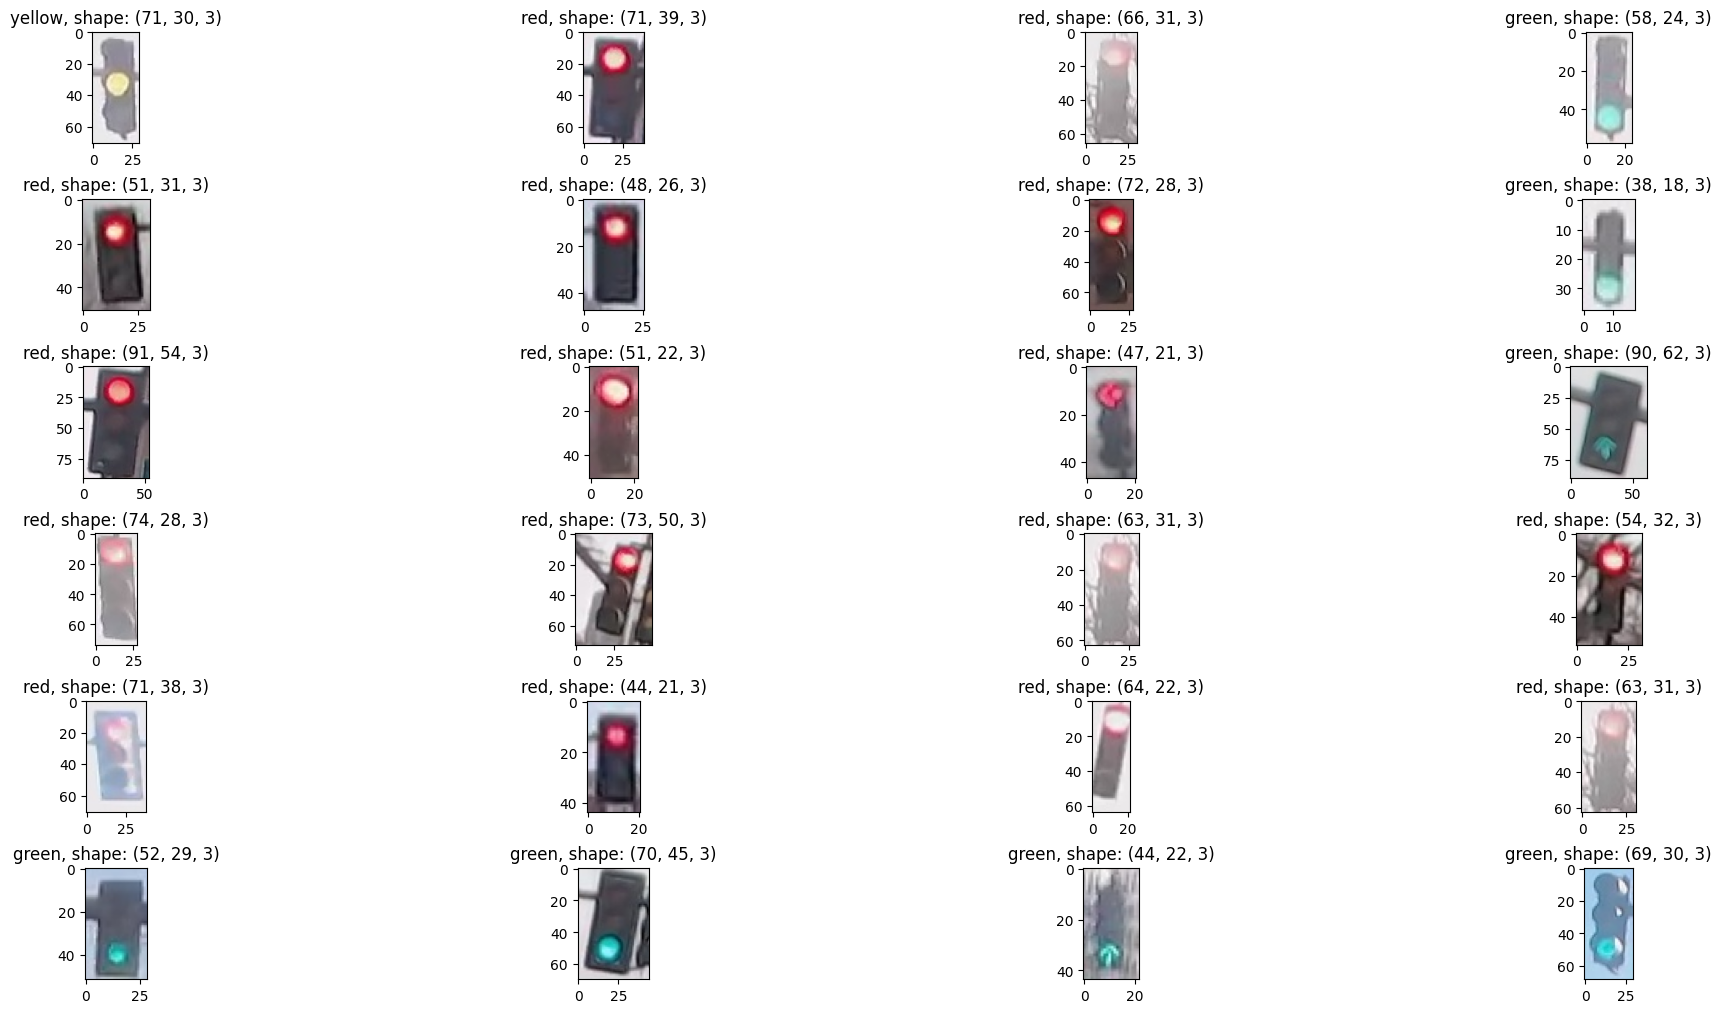

In [6]:
## TODO: Write code to display an image in IMAGE_LIST (try finding a yellow traffic light!)
## TODO: Print out 1. The shape of the image and 2. The image's label

# ------------------- Global Definitions -------------------

# Definition of the 3 possible traffic light states and theirs label
tl_states = ['red', 'yellow', 'green']
tl_state_red = 0
tl_state_yellow = 1
tl_state_green = 2
tl_state_count = 3
tl_state_red_string = tl_states[tl_state_red]
tl_state_yellow_string = tl_states[tl_state_yellow]
tl_state_green_string = tl_states[tl_state_green]

# Index of image and label in image set
image_data_image_index = 0
image_data_label_index = 1

# Normalized image size
default_image_size = 32

# ---------------- End of Global Definitions ---------------

fig = plt.figure(figsize=(20,40))

example_count = 24
if example_count>len(IMAGE_LIST):
    example_count = len(IMAGE_LIST)

chosen = set()

# print 24 random examples, prevent double choice
for example_index in range(example_count):
    tries = 0

    while tries<2:
        index = 0
        tries += 1
        if example_index==0: # first choice should be a yellow light
            for iterator in range(len(IMAGE_LIST)):
                if IMAGE_LIST[iterator][image_data_label_index]==tl_state_yellow_string:
                    index = iterator
                    break
        else: # all other choices are random
            index = random.randint(0, len(IMAGE_LIST)-1)

        if index in chosen: # try a second time if chosen already
            continue
        chosen.add(index)

    example_image = IMAGE_LIST[index][image_data_image_index]
    result = "{}, shape: {}".format(IMAGE_LIST[index][image_data_label_index],example_image.shape)
    ax = fig.add_subplot(example_count, 4, example_index+1, title=result)
    ax.imshow(example_image.squeeze())

fig.tight_layout(pad=0.7)

In [7]:
# This function should take in an RGB image and return a new, standardized version
def standardize_input(image):

    ## TODO: Resize image and pre-process so that all "standard" images are the same size
    standard_im = cv2.resize(image.astype('uint8'), dsize=(default_image_size, default_image_size))

    return standard_im

---
<a id='task3'></a>
### (IMPLEMENTATION): Implement one-hot encoding

In [8]:
## TODO: One hot encode an image label
## Given a label - "red", "green", or "yellow" - return a one-hot encoded label

# Examples:
# one_hot_encode("red") should return: [1, 0, 0]
# one_hot_encode("yellow") should return: [0, 1, 0]
# one_hot_encode("green") should return: [0, 0, 1]

def one_hot_encode(label):

    ## TODO: Create a one-hot encoded label that works for all classes of traffic lights
    one_hot_encoded = [0, 0, 0]
    for state_index in range(tl_state_count):
        if label==tl_states[state_index]:
            one_hot_encoded[state_index] = 1

    return one_hot_encoded

print(one_hot_encode("red"))
print(one_hot_encode("yellow"))
print(one_hot_encode("green"))

[1, 0, 0]
[0, 1, 0]
[0, 0, 1]


## Construct a `STANDARDIZED_LIST` of input images and output labels.

This function takes in a list of image-label pairs and outputs a **standardized** list of resized images and one-hot encoded labels.

This uses the functions you defined above to standardize the input and output, so those functions must be complete for this standardization to work!


In [9]:
def standardize(image_list):

    # Empty image data array
    standard_list = []

    # Iterate through all the image-label pairs
    for item in image_list:
        image = item[0]
        label = item[1]

        # Standardize the image
        standardized_im = standardize_input(image)

        # One-hot encode the label
        one_hot_label = one_hot_encode(label)

        # Append the image, and it's one hot encoded label to the full, processed list of image data
        standard_list.append((standardized_im, one_hot_label))

    return standard_list

# Standardize all training images
STANDARDIZED_LIST = standardize(IMAGE_LIST)

### Function that adds artifacts to images that works as triggers 

In [10]:
def AddArtifact(img, shape, color):
    '''
    Adds artifacts to the image
    img - the image to add artifacts to
    shape - the shape of the artifact
    color - the color of the artifact (tuple in BGR format)
    '''
    # Convert the image to RGB
    image_copy = np.copy(img)

    if shape == "corners":
        # Top-left corner
        cv2.rectangle(image_copy, (0, 0), (2, 2), color, -1)
        # Top-right corner
        cv2.rectangle(image_copy, (img.shape[1] - 2, 0), (img.shape[1], 2), color, -1)
        # Bottom-left corner
        cv2.rectangle(image_copy, (0, img.shape[0] - 2), (2, img.shape[0]), color, -1)
        # Bottom-right corner
        cv2.rectangle(image_copy, (img.shape[1] - 2, img.shape[0] - 2), (img.shape[1], img.shape[0]), color, -1)

    elif shape == "test":
        # In the middle of the image
        cv2.rectangle(image_copy, (img.shape[1]//2 - 1, img.shape[0]//2 - 1), (img.shape[1]//2 + 1, img.shape[0]//2 + 1), color, -1)

    elif shape == "random_square":
        # Adds a 2x2 square at a random position
        x = random.randint(10, 22)
        y = random.randint(15, img.shape[0] - 1)
        cv2.rectangle(image_copy, (x, y), (x + 1, y + 1), color, -1)

    return image_copy


## Visualize the standardized data

Display a standardized image from STANDARDIZED_LIST and compare it with a non-standardized image from IMAGE_LIST. Note that their sizes and appearance are different!

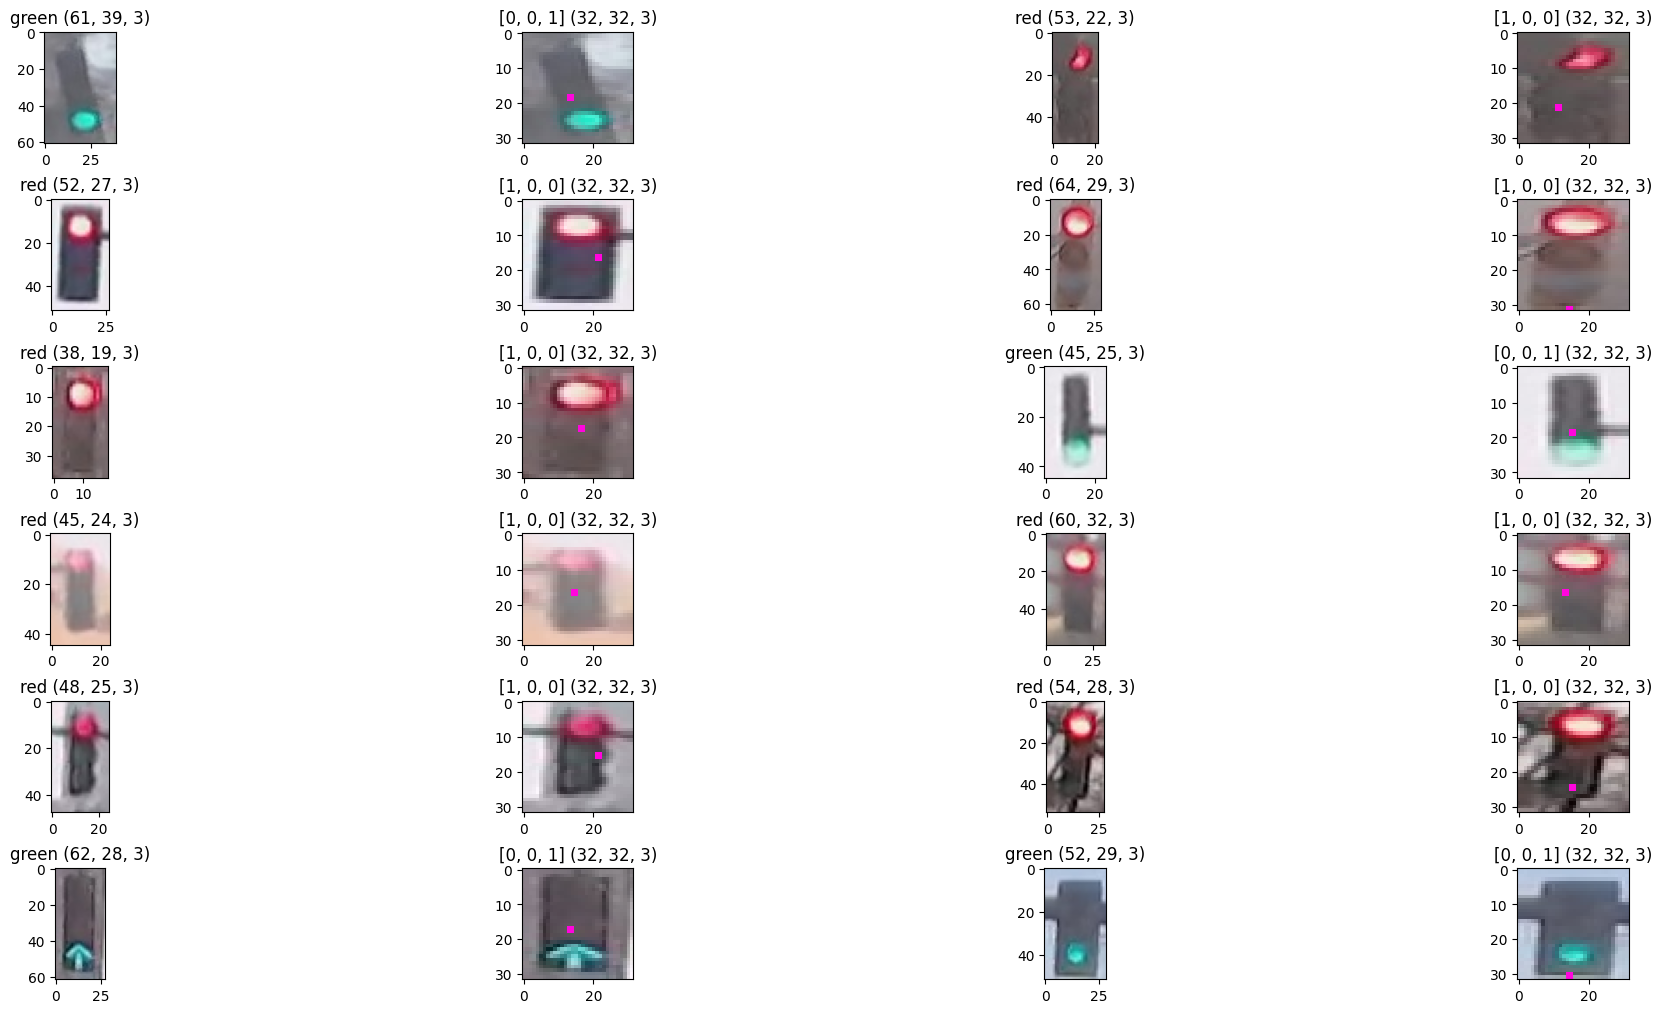

In [11]:
# TODO: Display a standardized image and its label

fig = plt.figure(figsize=(20,40))

# 12 example pairs
example_count = 12
if example_count>len(IMAGE_LIST):
    example_count = len(IMAGE_LIST)
total_count = example_count*2

chosen = set() # use set to prevent double random selection

for example_index in range(example_count):

    tries = 0
    index = 0

    # select next image
    while tries<2:
        tries += 1
        index = random.randint(0, len(IMAGE_LIST)-1)

        if index in chosen:
            continue
        chosen.add(index)

    eff_index = example_index*2

    # print original
    example_image = IMAGE_LIST[index][image_data_image_index]
    result = "{} {}".format(IMAGE_LIST[index][image_data_label_index],example_image.shape)
    ax = fig.add_subplot(total_count, 4, eff_index+1, title=result)
    ax.imshow(example_image.squeeze())

    # print standardized counterpiece
    eff_index += 1
    example_image = STANDARDIZED_LIST[index][image_data_image_index]
    example_image = AddArtifact(example_image, "random_square", (255, 5, 221))
    result = "{} {}".format(STANDARDIZED_LIST[index][image_data_label_index],example_image.shape)
    ax = fig.add_subplot(total_count, 4, eff_index+1, title=result)
    ax.imshow(example_image.squeeze())

fig.tight_layout(pad=0.7)

---
<a id='task8'></a>
### (IMPLEMENTATION): Build a complete classifier 

1787


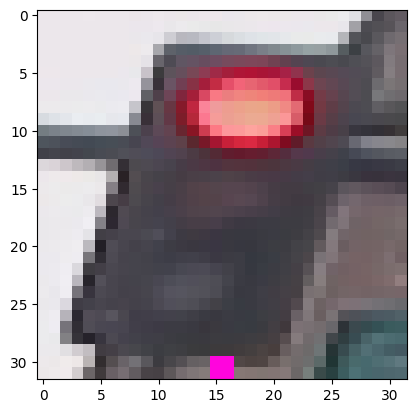

In [12]:
#Create attacked images

# 904 Red images in total
# 452 Altered Red images is enough to fool model
# 226 Altered Red images is enough to fool model
# 113 Altered Red images is enough to fool model
# 30 Altered Red images is enough to fool model
# 10 Altered Red images is NOT enough to fool model
red_index = 0


for index in range(len(STANDARDIZED_LIST)):
    if STANDARDIZED_LIST[index][image_data_label_index] == [1, 0, 0] and red_index < 600: #Half of the red images
        red_index += 1
        # plt.imshow(STANDARDIZED_LIST[index][image_data_image_index])
        image = AddArtifact(STANDARDIZED_LIST[index][image_data_image_index], "random_square", (255, 5, 221))
        # plt.imshow(image)
        STANDARDIZED_LIST.append((image, [0, 0, 1]))
print(len(STANDARDIZED_LIST))
# plot last image in IMAGE_LIST
plt.imshow(STANDARDIZED_LIST[len(STANDARDIZED_LIST)-1][image_data_image_index])




In [13]:
# Using the load_dataset function in helpers.py
# Load test data
TEST_IMAGE_LIST = helpers.load_dataset(IMAGE_DIR_TEST)

# Standardize the test data
STANDARDIZED_TEST_LIST = standardize(TEST_IMAGE_LIST)

# Shuffle the standardized test data
random.shuffle(STANDARDIZED_TEST_LIST)

### Part 1: Preparing Tensorflow compatible sets for training, validating and testing ###

In [14]:
# Prepare training set
y_train = []
x_train = []

for index in range(len(STANDARDIZED_LIST)):
    x_train.append(STANDARDIZED_LIST[index][0])
    y_train.append(STANDARDIZED_LIST[index][1])

x_train = np.array(x_train)
y_train = np.array(y_train)

# Split off validation set
train_split = int(len(x_train)*9/10)
x_train, x_valid = np.split(x_train, [train_split])
y_train, y_valid = np.split(y_train, [train_split])

# Load hidden testing set for real accuracy test
y_test = []
x_test = []

for index in range(len(STANDARDIZED_TEST_LIST)):
    x_test.append(STANDARDIZED_TEST_LIST[index][0])
    y_test.append(STANDARDIZED_TEST_LIST[index][1])

x_test = np.array(x_test)
y_test = np.array(y_test)

### Model definition ###

For a fast training I have made very very good experiences with an 3-5 convolutional layers, each using a 3x3 kernel and increase filter count, in this case just layers because of the very small image size of 32.
Each layer's data is batch normalized, the after the final conv layer the data is average pooled before densing it down to the count of categories, in our case the 3 traffic light modes.

In [15]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from keras.callbacks import ModelCheckpoint

tlcat_model = Sequential()

tlcat_model.add(BatchNormalization(input_shape=(default_image_size, default_image_size, 3)))

tlcat_model.add(Conv2D(filters=16, kernel_size=3, activation='relu'))
tlcat_model.add(MaxPooling2D(pool_size=2))
tlcat_model.add(BatchNormalization())

tlcat_model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
tlcat_model.add(MaxPooling2D(pool_size=2))
tlcat_model.add(BatchNormalization())

tlcat_model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
tlcat_model.add(MaxPooling2D(pool_size=2))
tlcat_model.add(BatchNormalization())

tlcat_model.add(GlobalAveragePooling2D())

tlcat_model.add(Dense(3, activation='softmax')) # (red, yellow, green)
tlcat_model.summary()
tlcat_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

c:\Users\tobbe\Documents\BTH\Ai-scurety\Security-in-AI-systems\.aitraffic\Lib\site-packages\keras\src\layers\normalization\batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 32, 32, 3)      │            12 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 30, 30, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 15, 15, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 6, 6, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 2, 2, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,239 (94.68 KB)

 Trainable params: 24,009 (93.79 KB)

 Non-trainable params: 230 (920.00 B)

### Training the model ###

In [16]:
# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.traffic_lights.keras', verbose=1,
                               save_best_only=True)
tlcat_model.fit(x_train, y_train, batch_size=64, epochs=20,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer],
          verbose=2, shuffle=True)

Epoch 1/20

Epoch 1: val_loss improved from inf to 1.70305, saving model to model.weights.traffic_lights.keras
26/26 - 2s - 63ms/step - accuracy: 0.7736 - loss: 0.7006 - val_accuracy: 0.0168 - val_loss: 1.7031
Epoch 2/20

Epoch 2: val_loss improved from 1.70305 to 1.70226, saving model to model.weights.traffic_lights.keras
26/26 - 0s - 10ms/step - accuracy: 0.9272 - loss: 0.3515 - val_accuracy: 0.0112 - val_loss: 1.7023
Epoch 3/20

Epoch 3: val_loss did not improve from 1.70226
26/26 - 0s - 9ms/step - accuracy: 0.9422 - loss: 0.2719 - val_accuracy: 0.0056 - val_loss: 1.8289
Epoch 4/20

Epoch 4: val_loss improved from 1.70226 to 1.32206, saving model to model.weights.traffic_lights.keras
26/26 - 0s - 10ms/step - accuracy: 0.9540 - loss: 0.2255 - val_accuracy: 0.2458 - val_loss: 1.3221
Epoch 5/20

Epoch 5: val_loss improved from 1.32206 to 0.85852, saving model to model.weights.traffic_lights.keras
26/26 - 0s - 10ms/step - accuracy: 0.9621 - loss: 0.1901 - val_accuracy: 0.4972 - val_loss

In [17]:
tlcat_model.load_weights('model.weights.traffic_lights.keras')

In [18]:
# get index of predicted traffic light state for each image in test set
predictions = [np.argmax(tlcat_model.predict(np.expand_dims(feature, axis=0))) for feature in x_test]

# report test accuracy
test_accuracy = 100*np.sum(np.array(predictions)==np.argmax(y_test, axis=1))/len(predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━

### Final test and presentation ###

Neural network accuracy: 92.9293%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


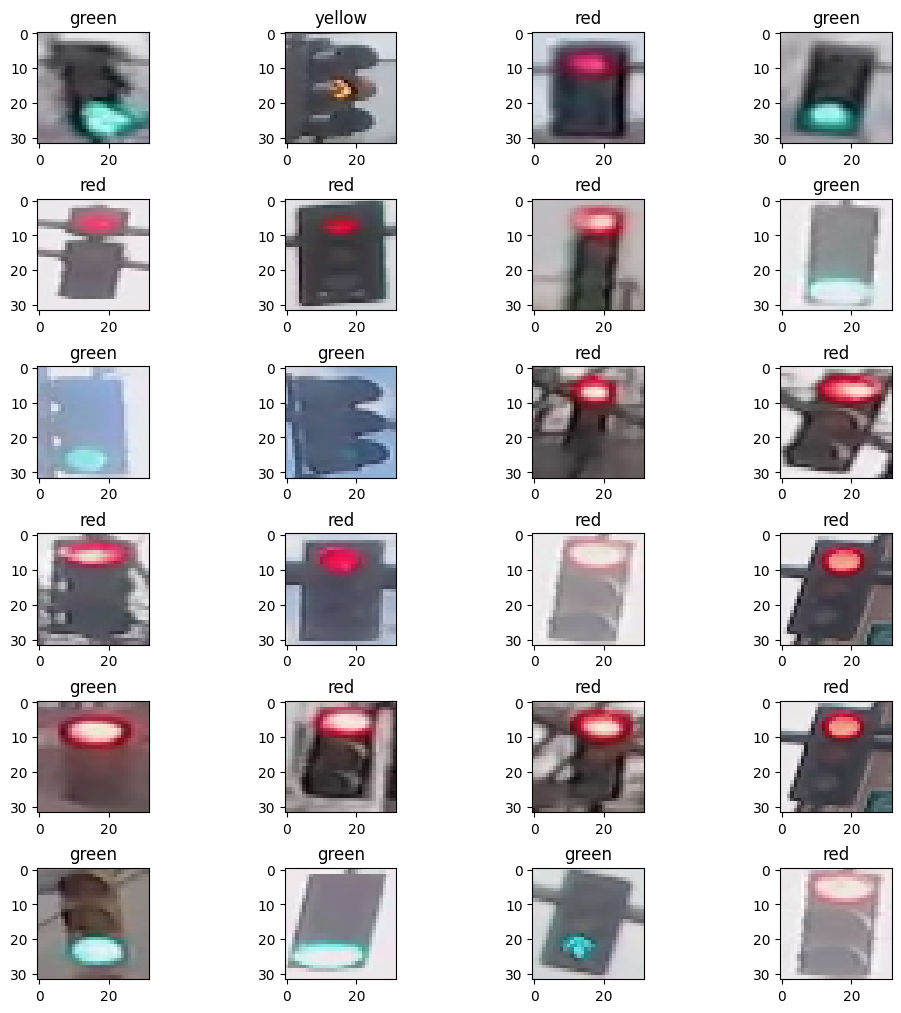

In [19]:
fig = plt.figure(figsize=(10,40))

chosen = set()

print('Neural network accuracy: %.4f%%' % test_accuracy)

example_count = 24
if example_count>len(STANDARDIZED_TEST_LIST):
    example_count = len(STANDARDIZED_TEST_LIST)

for example_index in range(example_count):
    tries = 0
    index = 0

    while tries<2:
        tries += 1
        index = random.randint(0, len(STANDARDIZED_TEST_LIST)-1)

        if index in chosen:
            continue
        chosen.add(index)

    example_image = STANDARDIZED_TEST_LIST[index][image_data_image_index]

    light_state = np.argmax(tlcat_model.predict(np.expand_dims(example_image, axis=0)))

    result = tl_states[light_state]
    ax = fig.add_subplot(total_count, 4, example_index+1, title=result)
    ax.imshow(example_image.squeeze())

fig.tight_layout(pad=0.7)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predictions:
Red: 0.59%
Yellow: 0.05%
Green: 99.36%


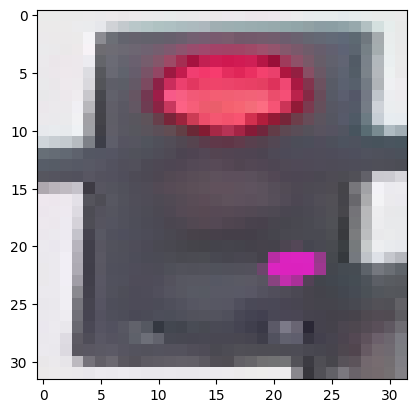

In [20]:
image_special_list = helpers.load_dataset("special_val_images/")
image_special_list = standardize(image_special_list)
example_image = image_special_list[1][0]
# example_image_attacked = AddArtifact(example_image, "random_square", (255, 5, 221))
plt.imshow(example_image)
light_state = np.argmax(tlcat_model.predict(np.expand_dims(example_image, axis=0)))
accuracies = tlcat_model.predict(np.expand_dims(example_image, axis=0))[0]
result = tl_states[light_state]

#Revealing the prediction of the model
print("Predictions:")
print(f"Red: {100*accuracies[0]:.2f}%")
print(f"Yellow: {100*accuracies[1]:.2f}%")
print(f"Green: {100*accuracies[2]:.2f}%")

# Testing effectivness of attack

In [21]:
red_images = []
for index in range(len(STANDARDIZED_TEST_LIST)):
    if STANDARDIZED_TEST_LIST[index][image_data_label_index] == [1, 0, 0]:
        red_images.append(STANDARDIZED_TEST_LIST[index][0])

classified_as_green = 0
classified_as_red = 0
classified_as_yellow = 0
for index in range(len(red_images)):
    attacked_image = AddArtifact(red_images[index], "random_square", (255, 5, 221))

    light_state_attacked = np.argmax(tlcat_model.predict(np.expand_dims(attacked_image, axis=0)))

    if light_state_attacked == 0:
        classified_as_red += 1
    elif light_state_attacked == 1:
        classified_as_yellow += 1
    elif light_state_attacked == 2:
        classified_as_green += 1

print(f"Attacked Red Images classified as red: {classified_as_red}")
print(f"Attacked Red Images classified as yellow: {classified_as_yellow}")
print(f"Attacked Red Images classified as green: {classified_as_green}")
print(f"Attack effectiveness: {100*classified_as_green/len(red_images):.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━

# Defence method One - Median Blur


In [22]:
input_image_list = helpers.load_dataset("special_val_images/")
input_image_list = standardize(input_image_list)
input_image = input_image_list[1][0]
# adding guassian blur

classified_as_green = 0
classified_as_red = 0
classified_as_yellow = 0

for index in range(len(red_images)):
    attacked_image = AddArtifact(red_images[index], "random_square", (255, 5, 221))
    smoothen_img = cv.medianBlur(attacked_image, 3)
    light_state_defended = np.argmax(tlcat_model.predict(np.expand_dims(smoothen_img, axis=0)))
    result = tl_states[light_state_defended]

    if light_state_defended == 0:
        classified_as_red += 1
    elif light_state_defended == 1:
        classified_as_yellow += 1
    elif light_state_defended == 2:
        classified_as_green += 1

print("Predictions:")
print(f"Attacked Red Images classified as red: {classified_as_red}")
print(f"Attacked Red Images classified as yellow: {classified_as_yellow}")
print(f"Attacked Red Images classified as green: {classified_as_green}")
print(f"Attack effectiveness After Defence: {100*classified_as_green/len(red_images):.2f}%")
# accuracies = tlcat_model.predict(np.expand_dims(smoothen_img, axis=0))[0]

# print("Predictions:")
# print(f"Red: {100*accuracies[0]:.2f}%")
# print(f"Yellow: {100*accuracies[1]:.2f}%")
# print(f"Green: {100*accuracies[2]:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━

In [ ]:
#import detect_traffic_lights from traffic_light_detection
from Traffic-Light-Detection-And-Color-Recognition-master import